Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento de Imagens

#  Filtro de Difusão Anisotrópica (FDA)
### VANESSA BASTOS DA LUZ - UNIVALI - (quer meu CPF também?)
### Elian Ferreira

### Declaração de bibliotecas



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('sample_data/t1.jpg',0) # Abre a imagem pelo diretorio padrão

### Função de Padding



In [ ]:
def add_padding(img, padding_height, padding_width):
    n, m = img.shape

    padded_img = np.zeros((n + padding_height * 2, m + padding_width * 2))
    padded_img[padding_height : n + padding_height, padding_width : m + padding_width] = img

    return padded_img

### Função da Execução do Filtro



In [ ]:
def FDA(img, qtd):
    # 1
    #LOOK-UP TABLE
    LUT = np.zeros((256), dtype=np.float64)
    y_de_cabeca_pra_baixo = 15
    teta = 0.1

    # 2
    #cálculo da LUT
    for i in range(256):
      parte_de_cima = np.exp((-((i ** (1/5))/y_de_cabeca_pra_baixo))/5)
      LUT[i] = (1-np.exp(-8*teta*parte_de_cima))/8

    # 3
    for i_qtd in range(qtd):
      k_height, k_width = 3,3            # Kernel fixado 3x3
      pad_height, pad_width = 1,1        # Altura e Largura do Padding
      img_height, img_width = img.shape  # Altura e Largura da imagem

      padded_img = add_padding(img, pad_height, pad_width)     # Adicionar padding
      output = np.zeros((img_height, img_width), dtype=float)  # Inicializa o output

      # 4
      for i_img in range(img_height):  # Loop usando i
          for j_img in range(img_width):  # Loop usando j

              w1 = LUT[int(abs(padded_img[i_img,j_img] - padded_img[i_img-1,j_img-1]))]
              w2 = LUT[int(abs(padded_img[i_img,j_img] - padded_img[i_img-1,j_img]))]
              w3 = LUT[int(abs(padded_img[i_img,j_img] - padded_img[i_img-1,j_img+1]))]
              w4 = LUT[int(abs(padded_img[i_img,j_img] - padded_img[i_img,j_img-1]))]
              w6 = LUT[int(abs(padded_img[i_img,j_img] - padded_img[i_img,j_img+1]))]
              w7 = LUT[int(abs(padded_img[i_img,j_img] - padded_img[i_img+1,j_img-1]))]
              w8 = LUT[int(abs(padded_img[i_img,j_img] - padded_img[i_img+1,j_img]))]
              w9 = LUT[int(abs(padded_img[i_img,j_img] - padded_img[i_img+1,j_img+1]))]
              wC = 1 - (w1 + w2+ w3 + w4 + w6 + w7 + w8 + w9)

              # Kernel sempre é gerado baseado na posição do pixel da imagem
              kernel = [[w1,w2,w3],[w4,wC,w6],[w7,w8,w9]]

              for i_kernel in range(k_height):
                  for j_kernel in range(k_width):
                    output[i_img, j_img] = output[i_img, j_img] + (padded_img[i_img+i_kernel, j_img+j_kernel] * kernel[i_kernel][j_kernel])  # Fazendo a convolução
              output[i_img, j_img] = int(output[i_img, j_img])

      img = np.array(output, dtype=np.uint8)

    return img

### Função de adicionar ruído gaussiano



In [ ]:
#Ruído gaussiano é um ruído estatístico cuja função densidade de probabilidade é igual a da distribuição normal

def add_gaussian_noise(img, mean=0, std=25):
    h, w = img.shape
    noise = np.random.normal(mean, std, (h, w))
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 255)  # Clip para valores entre 0 e 255
    noisy_img = noisy_img.astype(np.uint8)
    return noisy_img

### Funções para compararação e resultados (PSNR e MRE)



In [ ]:
# Mede a qualidade da imagem restaurada em relação à imagem original

# Quanto maior o valor do PSNR, melhor é a qualidade da imagem restaurada
def calculate_psnr(img1, img2):
    mse = np.mean((img1.astype(float) - img2.astype(float)) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Quanto menor o valor do MSE, melhor é a qualidade da imagem restaurada
def calculate_mse(img1, img2):
    mse = np.mean((img1.astype(float) - img2.astype(float)) ** 2)
    return mse

### Execução do FDA


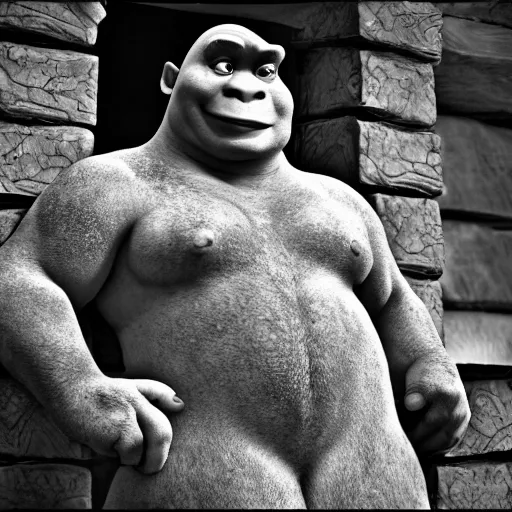

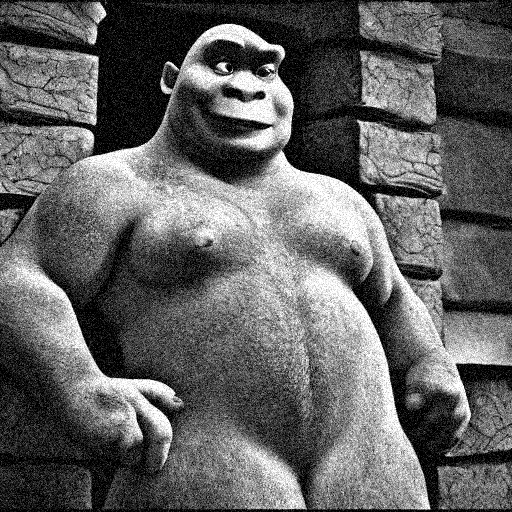

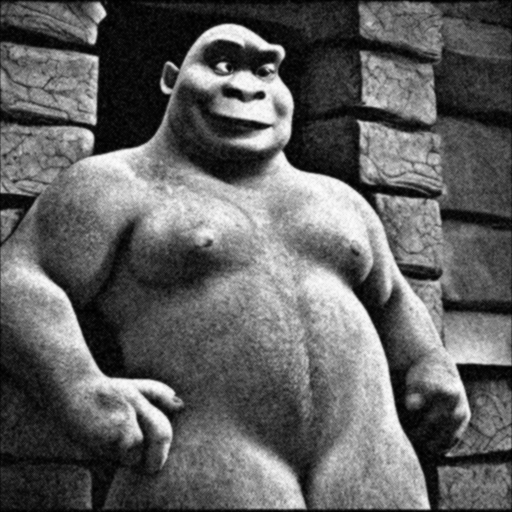

PSNR: 25.668049624810877 dB
MSE: 176.3093719482422


In [ ]:
# Verificar leitura da imagem
img_FDA = cv2.imread('sample_data/t1.jpg', 0)

# Adicionar ruído
img_FDA_RUIDO = add_gaussian_noise(img_FDA)

# Aplicar a função de convolução
img_FDA_Conv = FDA(img_FDA_RUIDO, 2)

cv2_imshow(img_FDA)
cv2_imshow(img_FDA_RUIDO)
cv2_imshow(img_FDA_Conv)

psnr_value = calculate_psnr(img_FDA, img_FDA_Conv)
mse_value = calculate_mse(img_FDA, img_FDA_Conv)

print(f"PSNR: {psnr_value} dB")
print(f"MSE: {mse_value}")

### Execução do Filtro Gaussiano


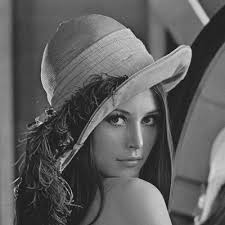

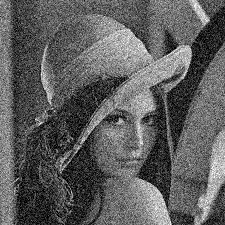

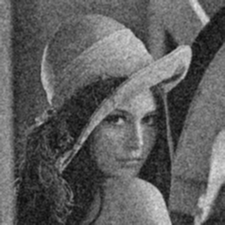

PSNR do filtro gaussiano 3x3: 26.795602502546274 dB
MSE do filtro gaussiano 3x3: 135.9941135802469


In [ ]:
# Verificar leitura da imagem
img_GAU = cv2.imread('sample_data/t1.jpg', 0)

# Adicionar ruído
img_GAU_RUIDO = add_gaussian_noise(img_GAU)

# Aplicar o Filtro Gaussiano
img_GAU_Gaussian = cv2.GaussianBlur(img_GAU_RUIDO, (3, 3), 0)

cv2_imshow(img_GAU)
cv2_imshow(img_GAU_RUIDO)
cv2_imshow(img_GAU_Gaussian)

psnr_value = calculate_psnr(img_GAU, img_GAU_Gaussian)
mse_value = calculate_mse(img_GAU, img_GAU_Gaussian)

print(f"PSNR do filtro gaussiano 3x3: {psnr_value} dB")
print(f"MSE do filtro gaussiano 3x3: {mse_value}")